In [24]:
print("Hello\nJupyter notebook")

Hello
Jupyter notebook


In [25]:
import pyupbit

#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-12-08 07:00:00,62959000.0,63200000.0,62638000.0,62802000.0,233.826766,1.470198e+10
2021-12-08 08:00:00,62802000.0,63207000.0,62672000.0,63204000.0,196.658995,1.238514e+10
2021-12-08 09:00:00,63205000.0,63400000.0,63016000.0,63315000.0,318.087682,2.011138e+10
2021-12-08 10:00:00,63340000.0,63450000.0,62954000.0,63077000.0,430.708494,2.725514e+10
2021-12-08 11:00:00,63028000.0,63376000.0,62704000.0,62705000.0,365.173420,2.301299e+10
...,...,...,...,...,...,...
2021-12-16 10:00:00,61400000.0,61430000.0,60700000.0,60862000.0,327.850757,1.998180e+10
2021-12-16 11:00:00,60860000.0,61034000.0,60846000.0,60977000.0,172.514000,1.051609e+10
2021-12-16 12:00:00,60977000.0,61000000.0,60505000.0,60664000.0,186.658999,1.133671e+10
2021-12-16 13:00:00,60664000.0,60868000.0,60506000.0,60731000.0,216.641105,1.313871e+10


In [26]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-12-08 07:00:00,62802000.0
1,2021-12-08 08:00:00,63204000.0
2,2021-12-08 09:00:00,63315000.0
3,2021-12-08 10:00:00,63077000.0
4,2021-12-08 11:00:00,62705000.0
...,...,...
195,2021-12-16 10:00:00,60862000.0
196,2021-12-16 11:00:00,60977000.0
197,2021-12-16 12:00:00,60664000.0
198,2021-12-16 13:00:00,60731000.0


In [27]:
#prophet 불러옴
#from fbprophet import Prophet
from prophet import Prophet

#학습
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -2.07962


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       839.374    0.00585818       307.962           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       845.292    0.00333393       102.879      0.8341      0.8341      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       845.305   1.78853e-05       100.915   1.826e-07       0.001      291  LS failed, Hessian reset 
     260       846.007   1.23773e-05       78.0137   1.757e-07       0.001      413  LS failed, Hessian reset 
     299        846.64   0.000818206       191.192           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       848.724   1.34573e-05       75.7763   1.169e-07       0.001      560  LS failed, Hessian reset 
     376       849.128   0.000109133  

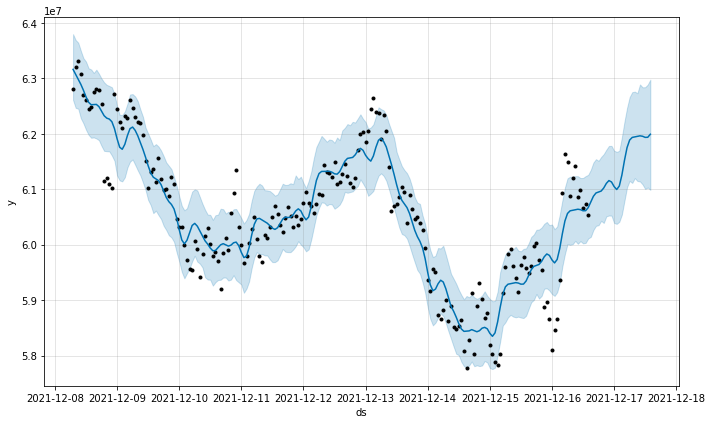

In [28]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

#그래프1
fig1 = model.plot(forecast)

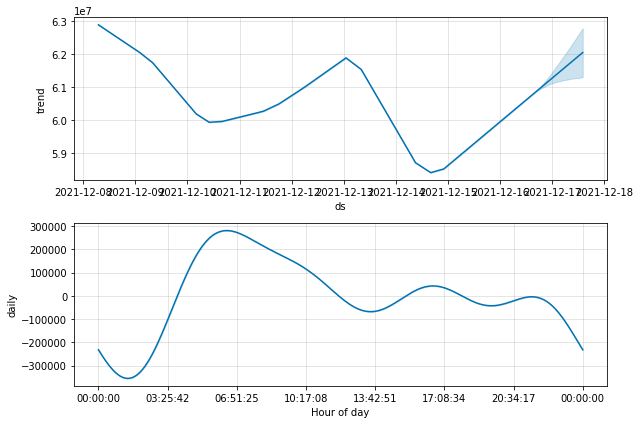

In [29]:
#그래프2
fig2 = model.plot_components(forecast)

In [30]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

60530000.0

In [31]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0] # yhat : 예측
closeValue

61952379.818609975

In [32]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  60530000.0
종가의 가격:  61952379.818609975


In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-08 07:00:00,6.289157e+07,6.260715e+07,6.379455e+07,6.289157e+07,6.289157e+07,267989.316283,267989.316283,267989.316283,267989.316283,267989.316283,267989.316283,0.0,0.0,0.0,6.315956e+07
1,2021-12-08 08:00:00,6.284741e+07,6.246622e+07,6.368963e+07,6.284741e+07,6.284741e+07,222537.445531,222537.445531,222537.445531,222537.445531,222537.445531,222537.445531,0.0,0.0,0.0,6.306995e+07
2,2021-12-08 09:00:00,6.280326e+07,6.245038e+07,6.364077e+07,6.280326e+07,6.280326e+07,177024.148746,177024.148746,177024.148746,177024.148746,177024.148746,177024.148746,0.0,0.0,0.0,6.298028e+07
3,2021-12-08 10:00:00,6.275910e+07,6.227938e+07,6.349545e+07,6.275910e+07,6.275910e+07,131173.692582,131173.692582,131173.692582,131173.692582,131173.692582,131173.692582,0.0,0.0,0.0,6.289027e+07
4,2021-12-08 11:00:00,6.271494e+07,6.218712e+07,6.336165e+07,6.271494e+07,6.271494e+07,68343.652998,68343.652998,68343.652998,68343.652998,68343.652998,68343.652998,0.0,0.0,0.0,6.278328e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-12-17 10:00:00,6.183048e+07,6.113943e+07,6.288786e+07,6.126552e+07,6.239161e+07,131173.692583,131173.692583,131173.692583,131173.692583,131173.692583,131173.692583,0.0,0.0,0.0,6.196165e+07
220,2021-12-17 11:00:00,6.188561e+07,6.108597e+07,6.283609e+07,6.128352e+07,6.249492e+07,68343.653001,68343.653001,68343.653001,68343.653001,68343.653001,68343.653001,0.0,0.0,0.0,6.195395e+07
221,2021-12-17 12:00:00,6.194073e+07,6.100429e+07,6.283805e+07,6.127289e+07,6.259689e+07,-6872.487331,-6872.487331,-6872.487331,-6872.487331,-6872.487331,-6872.487331,0.0,0.0,0.0,6.193386e+07
222,2021-12-17 13:00:00,6.199586e+07,6.103021e+07,6.288500e+07,6.129339e+07,6.269376e+07,-60377.200768,-60377.200768,-60377.200768,-60377.200768,-60377.200768,-60377.200768,0.0,0.0,0.0,6.193548e+07
